# Import Necessary Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler, LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, confusion_matrix

# EDA

## Reading the data

In [2]:
df = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/train.csv')
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
298,42,blue-collar,divorced,primary,no,28,yes,no,unknown,5,may,126,3,-1,0,unknown,no
2870,48,blue-collar,married,secondary,no,1405,yes,no,unknown,14,may,629,2,-1,0,unknown,yes
38817,23,blue-collar,single,secondary,no,39,yes,no,cellular,18,may,76,1,-1,0,unknown,no
7589,42,management,married,secondary,no,1607,yes,no,unknown,30,may,108,1,-1,0,unknown,no
25881,30,management,married,tertiary,no,5204,yes,no,cellular,19,nov,117,1,-1,0,unknown,no


# Getting Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### The Age Feature

In [5]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

/tmp/ipykernel_18/3548792170.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.histplot(df['age'],bins =30,kde=True,palette='viridis',linewidth=1.2, alpha=0.6)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


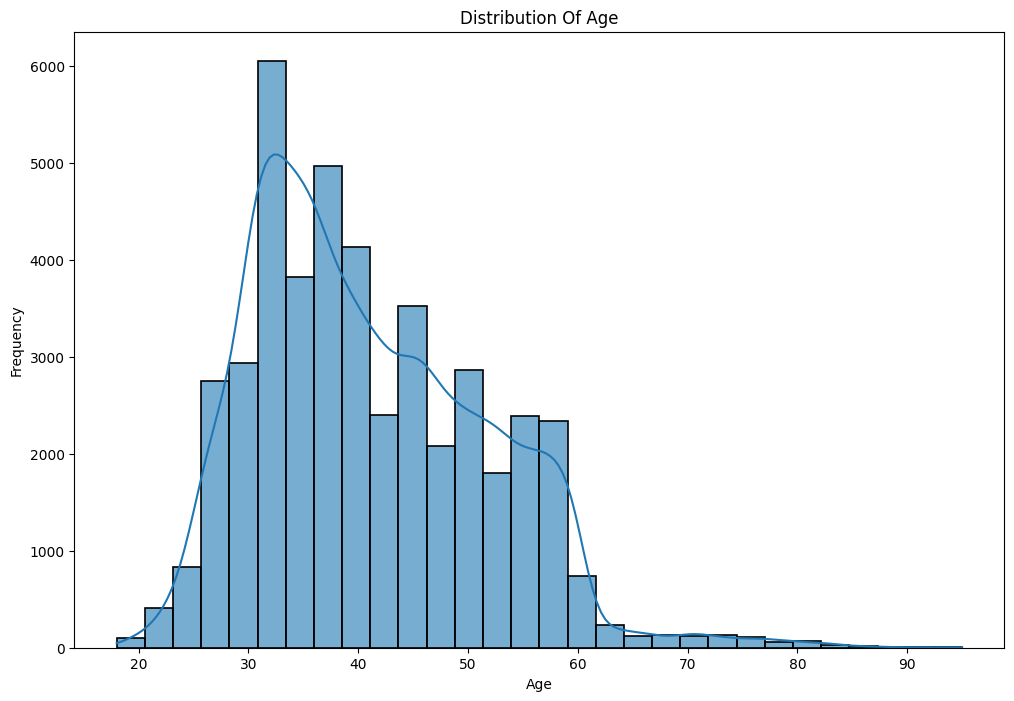

In [6]:
plt.figure(figsize=(12,8))

sn.histplot(df['age'],bins =30,kde=True,palette='viridis',linewidth=1.2, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution Of Age')
plt.show()

the most prevalent age is 30-48

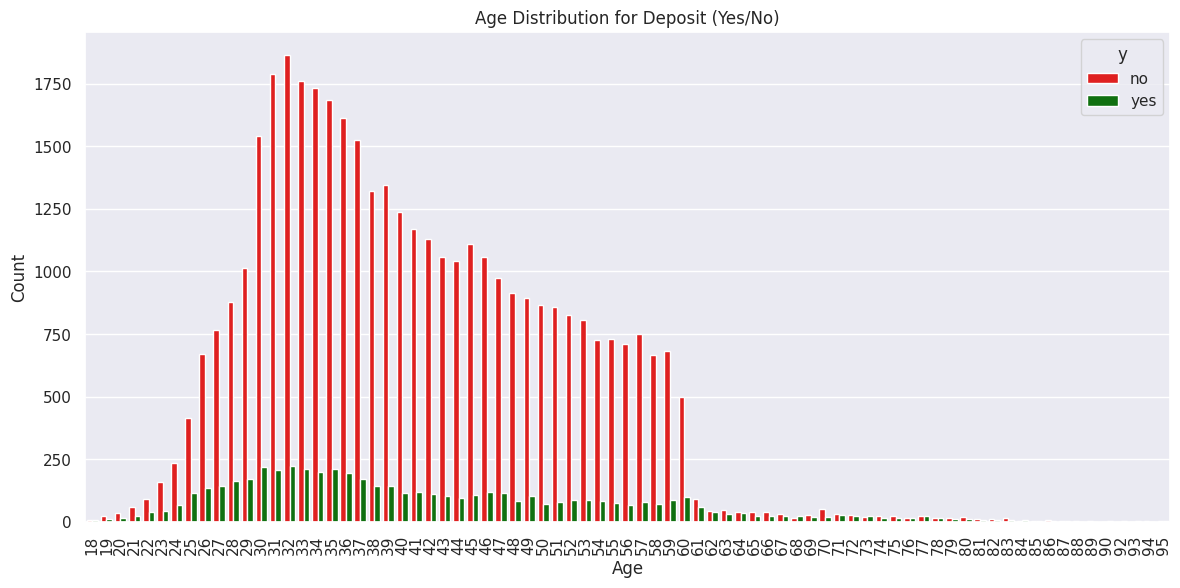

In [7]:
sn.set_theme()
plt.figure(figsize=(12, 6))
sn.countplot(x='age', hue='y', data=df ,palette={'no': 'red', 'yes': 'green'})
plt.title('Age Distribution for Deposit (Yes/No)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

### The Job Feature

In [8]:
job_count= df['job'].value_counts()
job_count

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

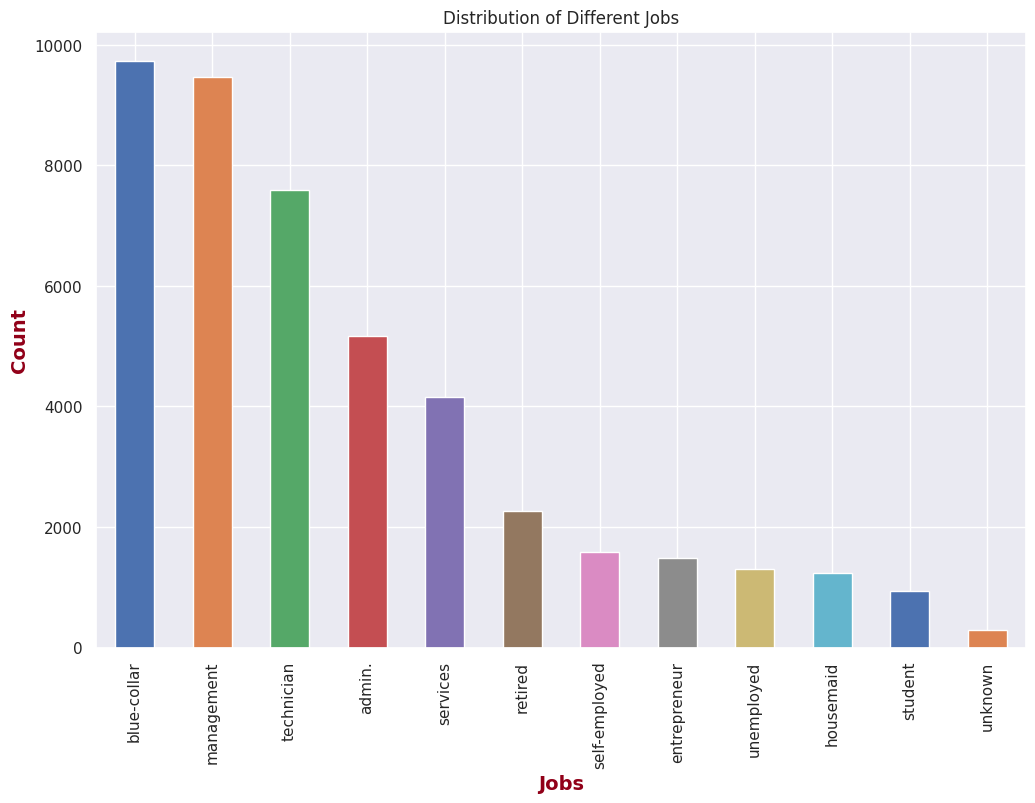

In [9]:
plt.figure(figsize = (12,8))
job_count.plot(kind='bar',color = sn.color_palette('deep'))
plt.title('Distribution of Different Jobs')
plt.xlabel('Jobs',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.show()

It is evident that Blue-Collar is the most prevalent occupation, with the highest count. 


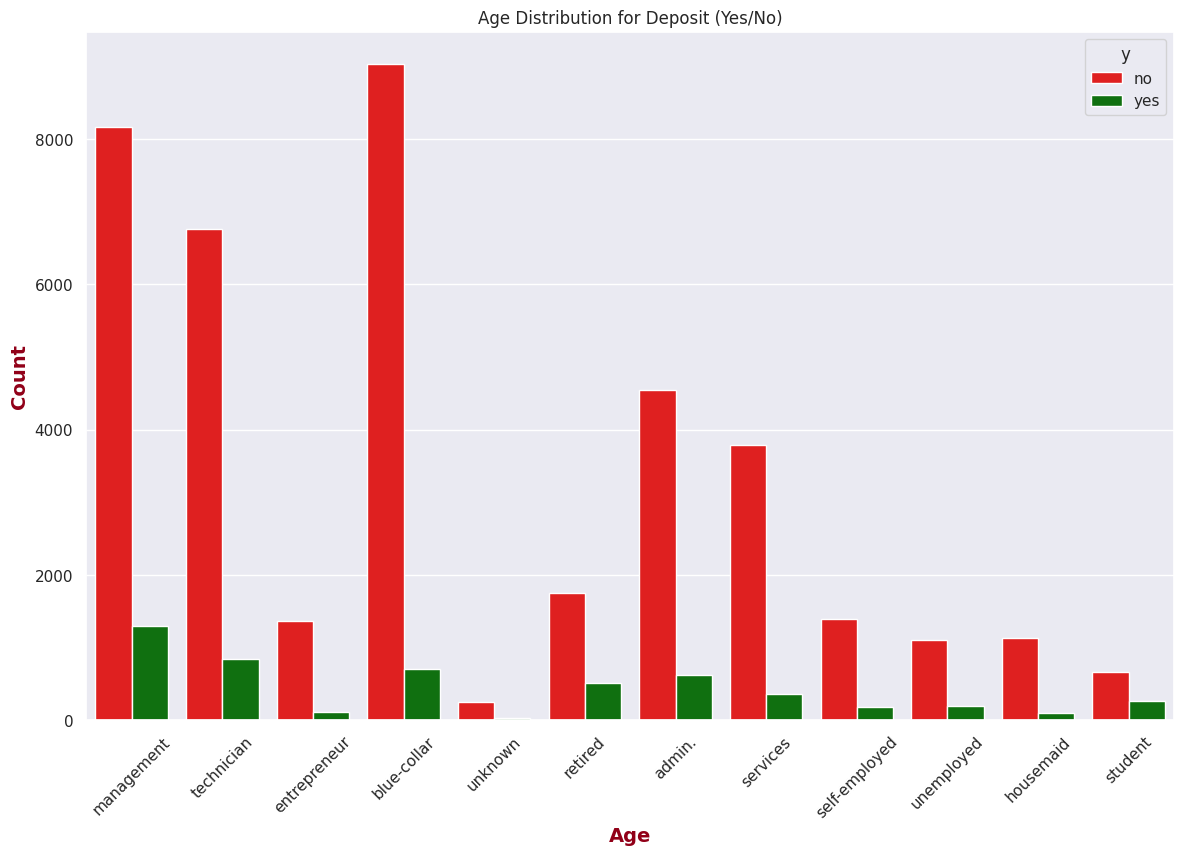

In [10]:
plt.figure(figsize=(12,8))
sn.countplot(x=df['job'], hue ='y',data =df, palette= {'yes': 'green', 'no':"red"})
plt.title('Age Distribution for Deposit (Yes/No)')
plt.xlabel('Age',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

managment customers are the most likely to deposit
,let's take a closer look in the next cell

In [11]:
most_job_deposit = df[df['y']=='yes']['job'].value_counts().sort_values(ascending= False)
most_job_deposit

job
management       1301
technician        840
blue-collar       708
admin.            631
retired           516
services          369
student           269
unemployed        202
self-employed     187
entrepreneur      123
housemaid         109
unknown            34
Name: count, dtype: int64

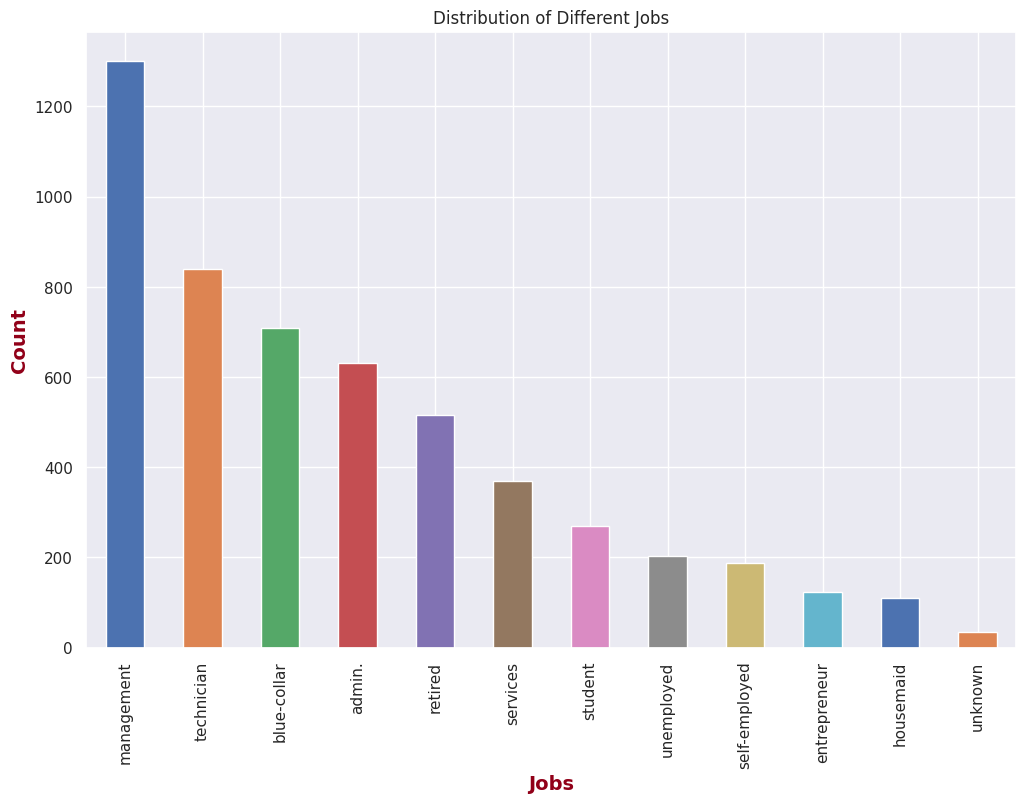

In [12]:
plt.figure(figsize = (12,8))
most_job_deposit.plot(kind='bar',color = sn.color_palette('deep'))
plt.title('Distribution of Different Jobs')
plt.xlabel('Jobs',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.show()

we will change unknown to others in the preprocessing part

## Visualizing The Rest of the Features:

/tmp/ipykernel_18/1228975449.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.histplot(df[i], kde=True,palette='viridis',linewidth=1.2, alpha=0.6)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/1228975

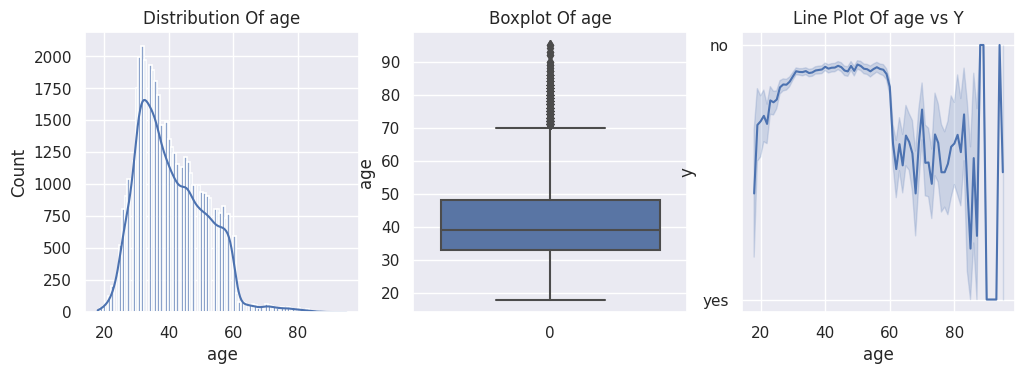

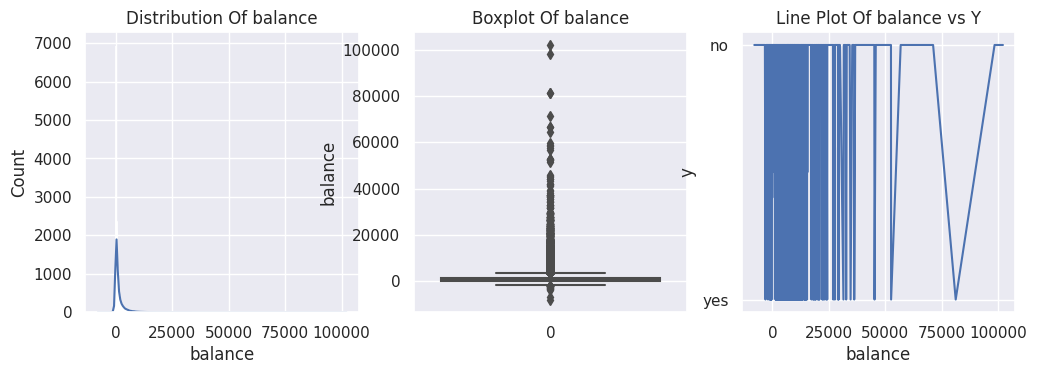

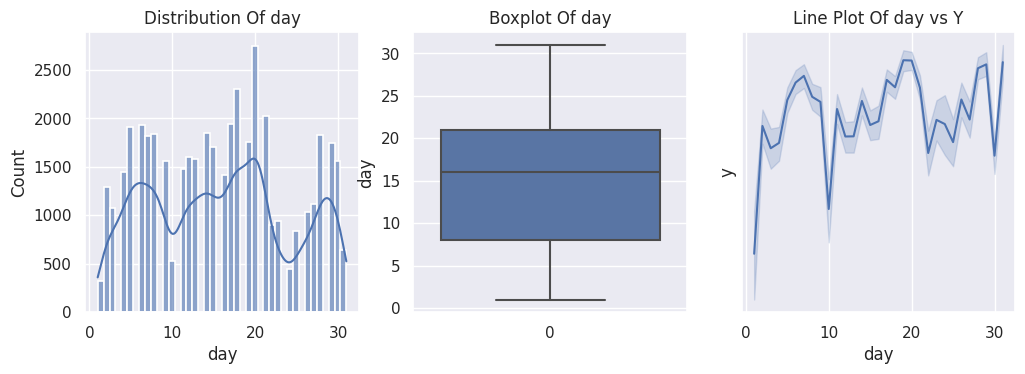

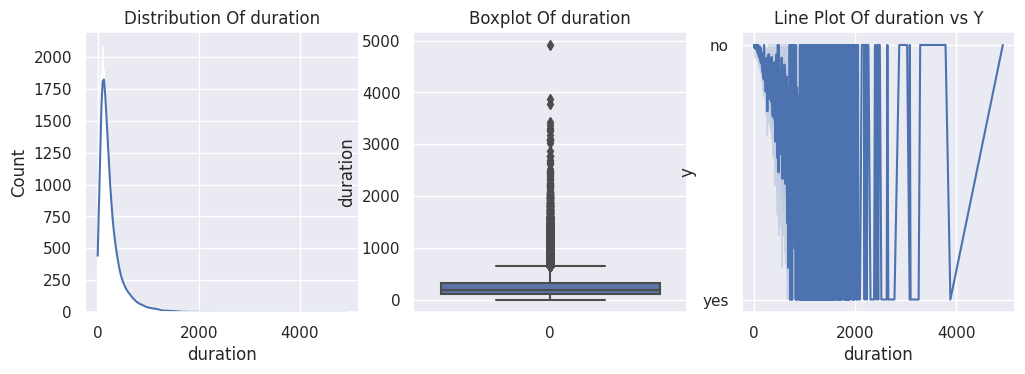

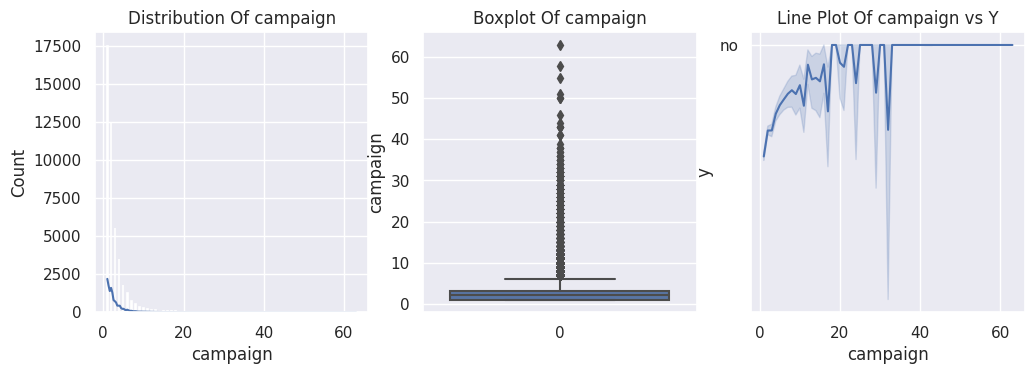

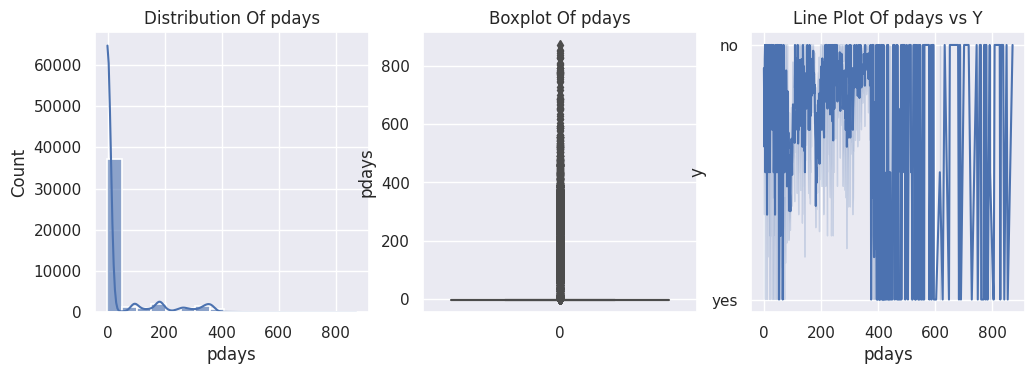

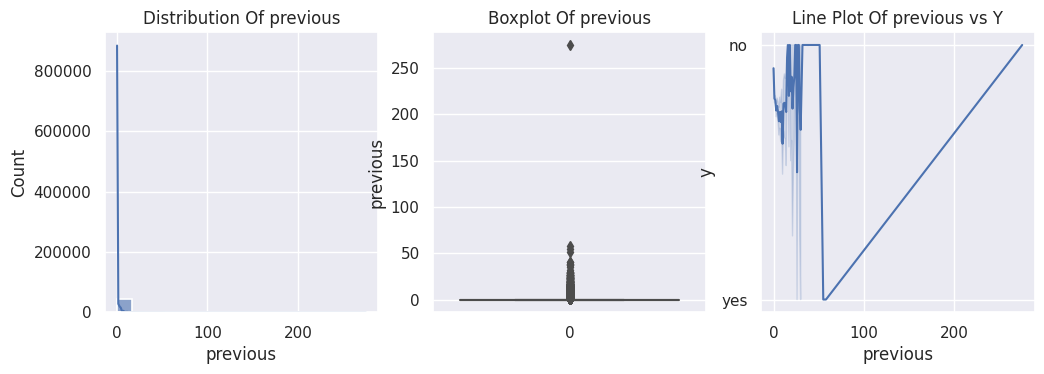

In [13]:
for i in df.columns:
    if df[i].dtype !="object":
        plt.figure(figsize=(12,8))
        
        plt.subplot(2,3,1)
        sn.histplot(df[i], kde=True,palette='viridis',linewidth=1.2, alpha=0.6)
        plt.title(f"Distribution Of {i}")
        
        plt.subplot(2,3,2)
        sn.boxplot(df[i])
        plt.ylabel(i)
        plt.title(f"Boxplot Of {i}")
        
        plt.subplot(2,3,3)
        sn.lineplot(data=df, x=i, y="y")
        plt.title(f"Line Plot Of {i} vs Y")

<Figure size 2500x1000 with 0 Axes>

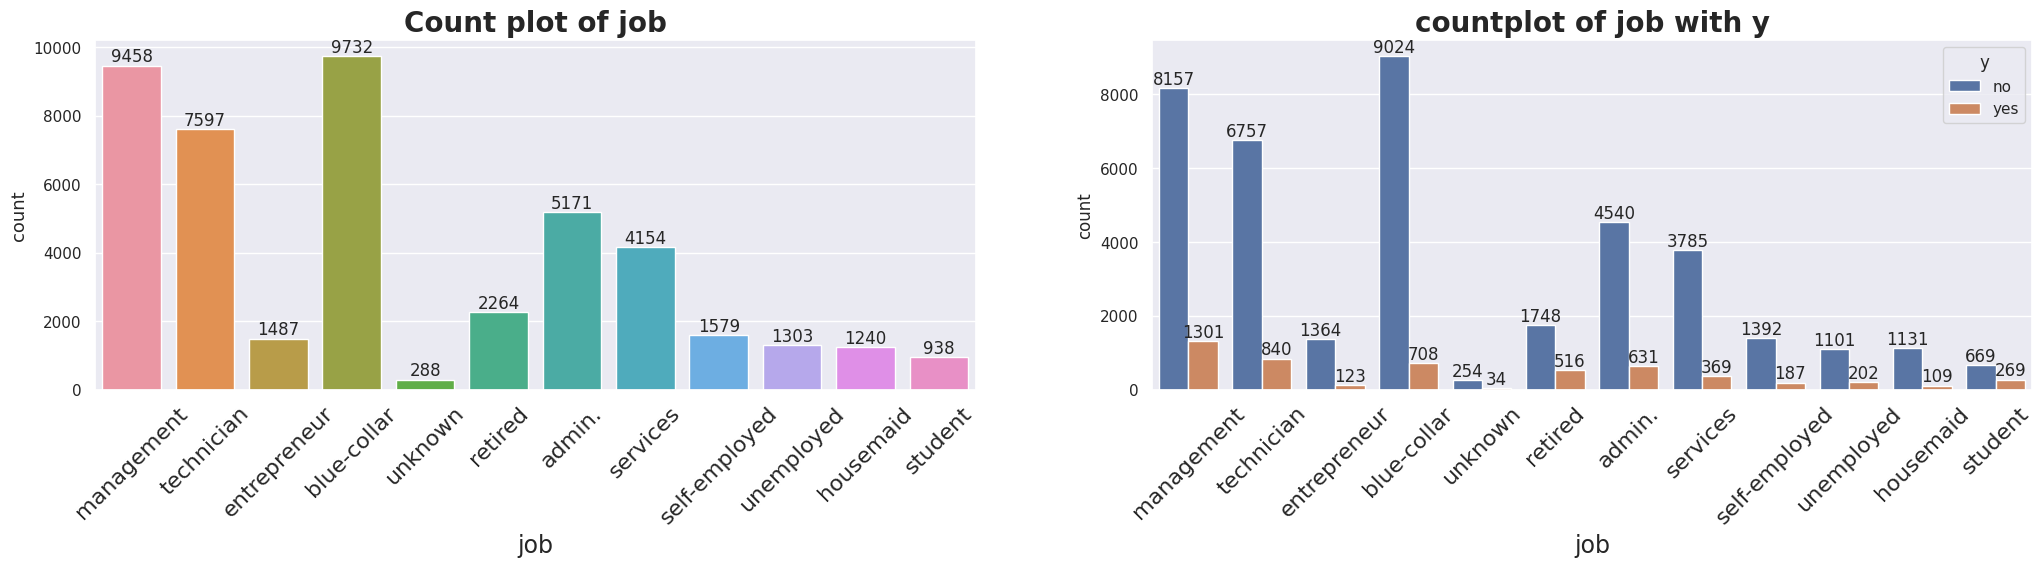

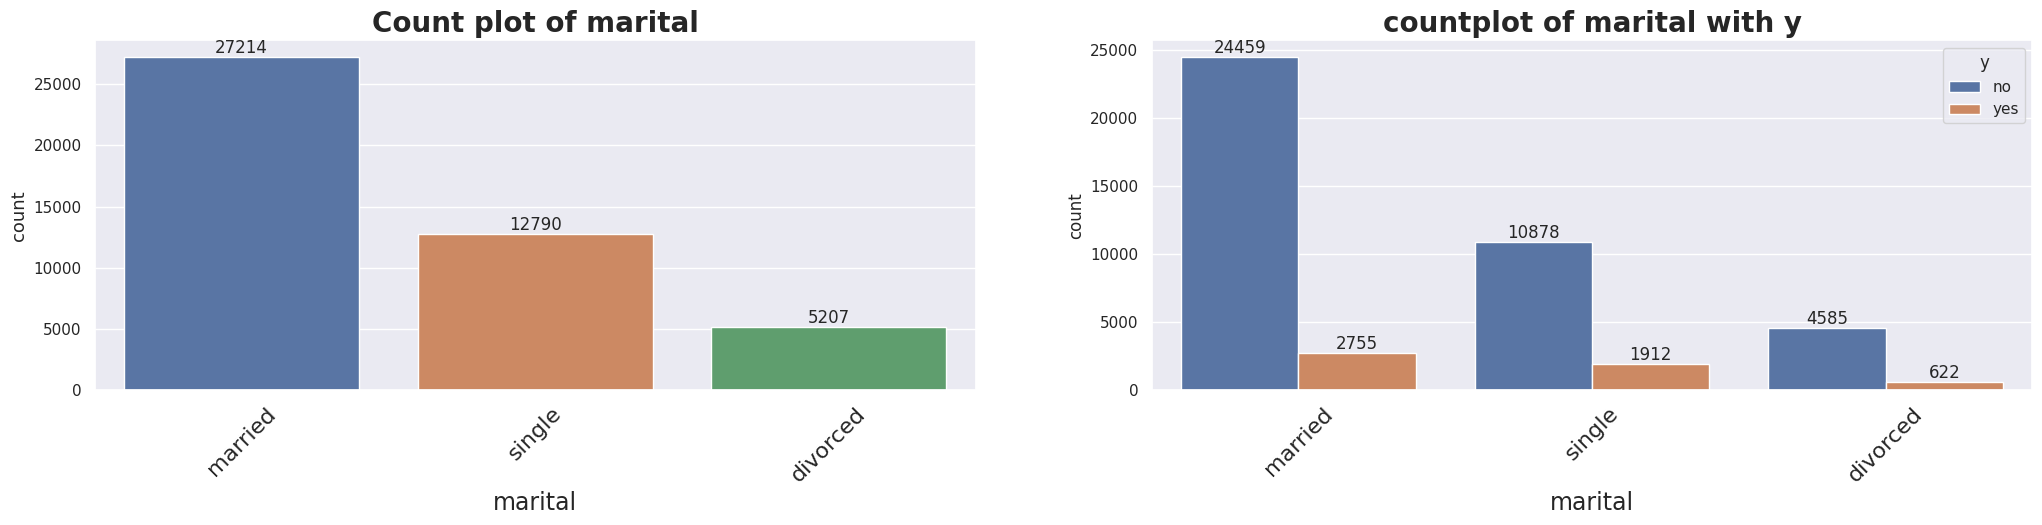

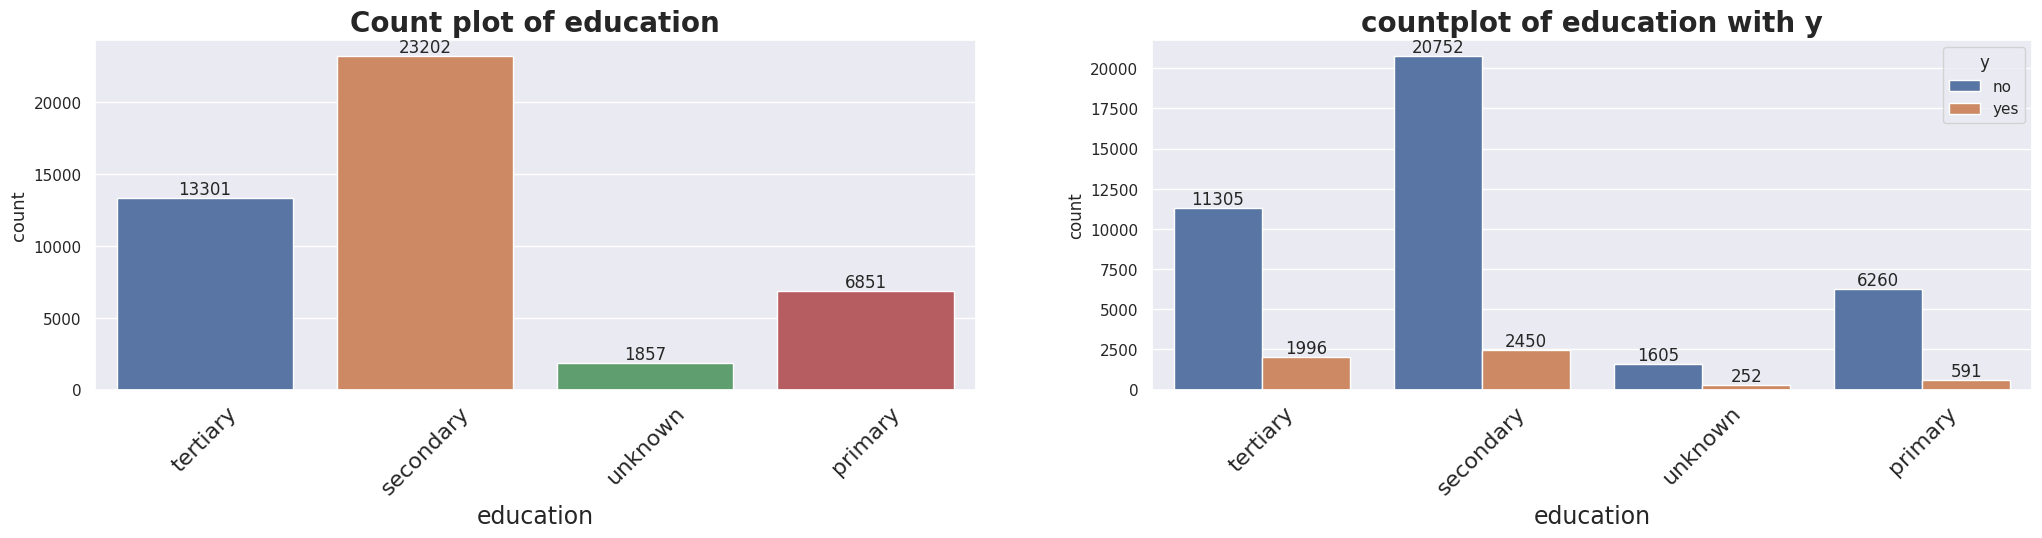

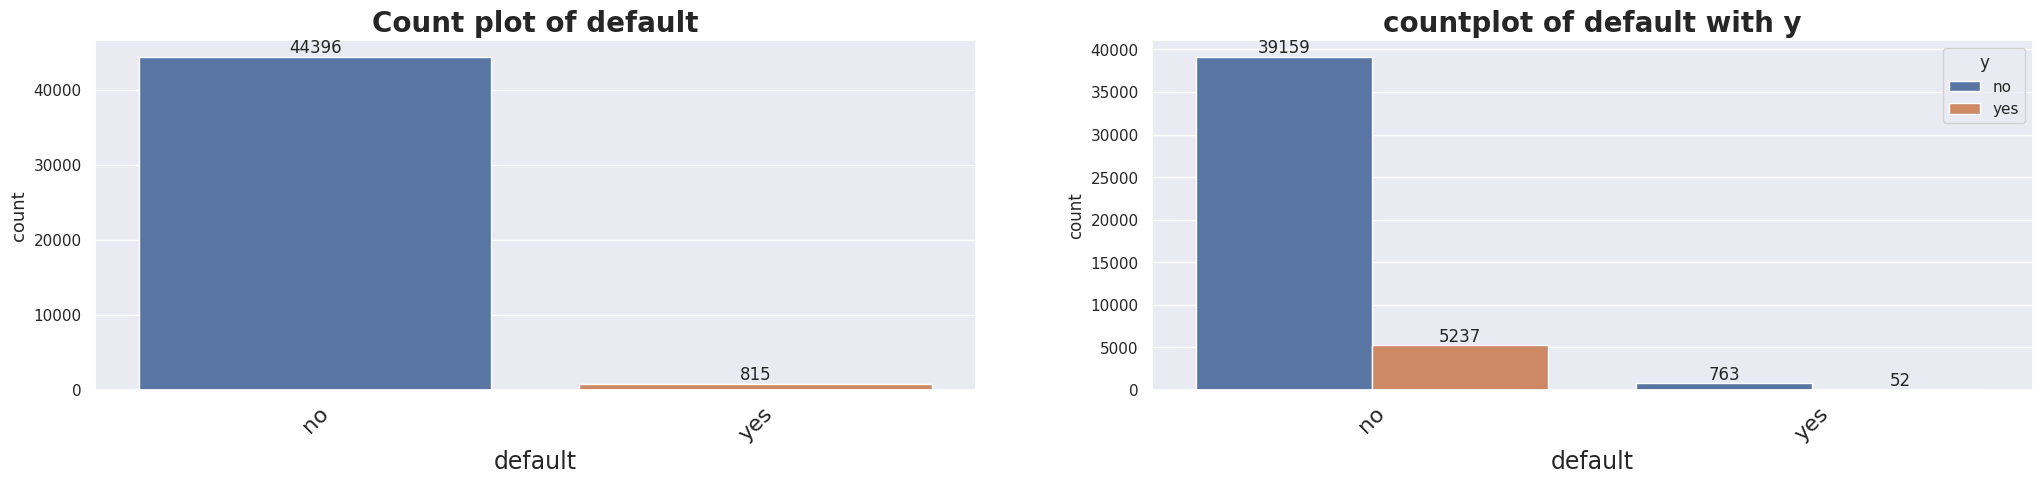

<Figure size 2500x1000 with 0 Axes>

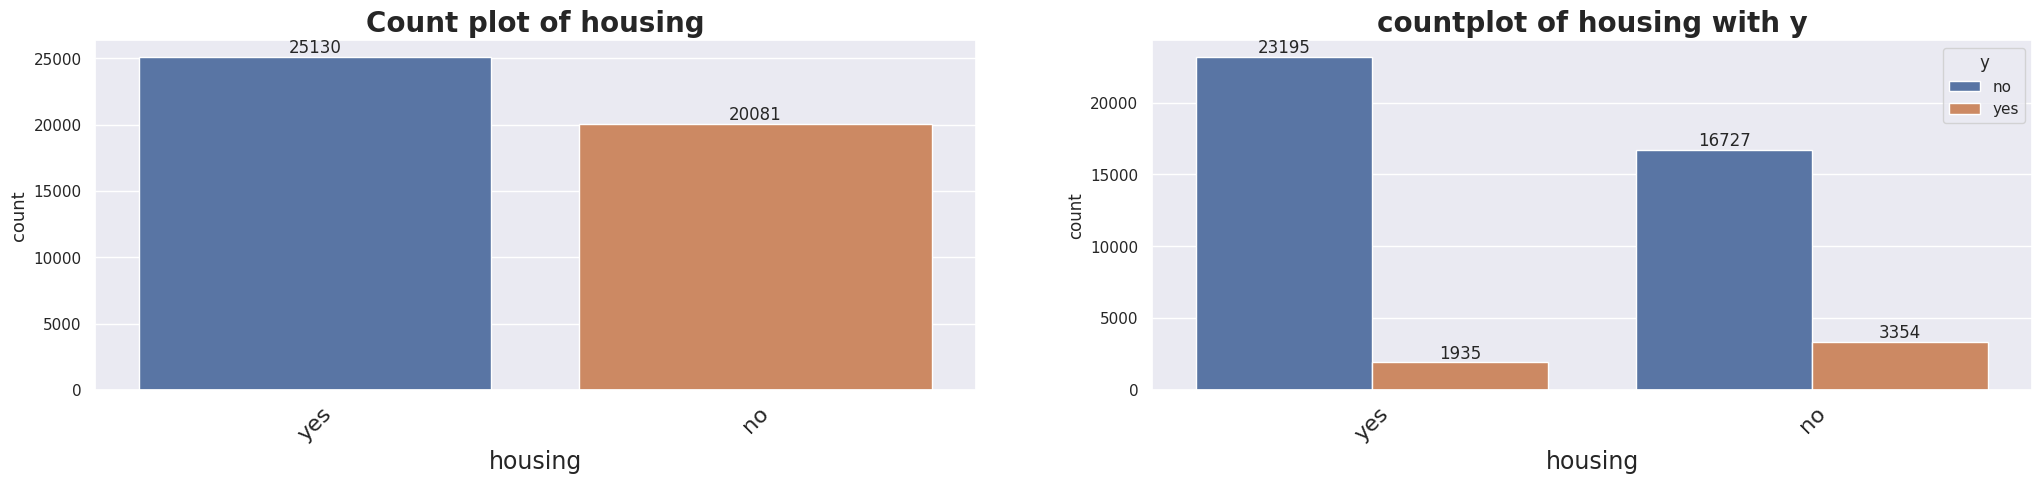

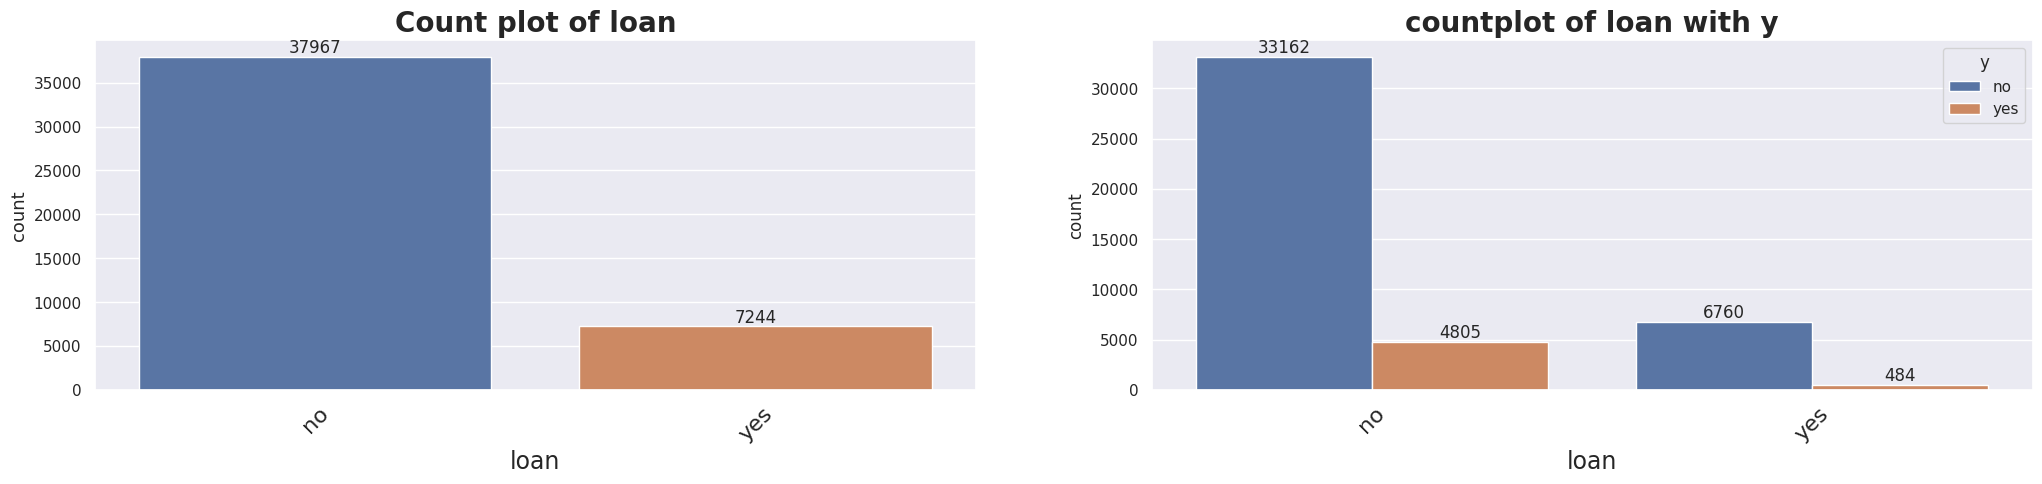

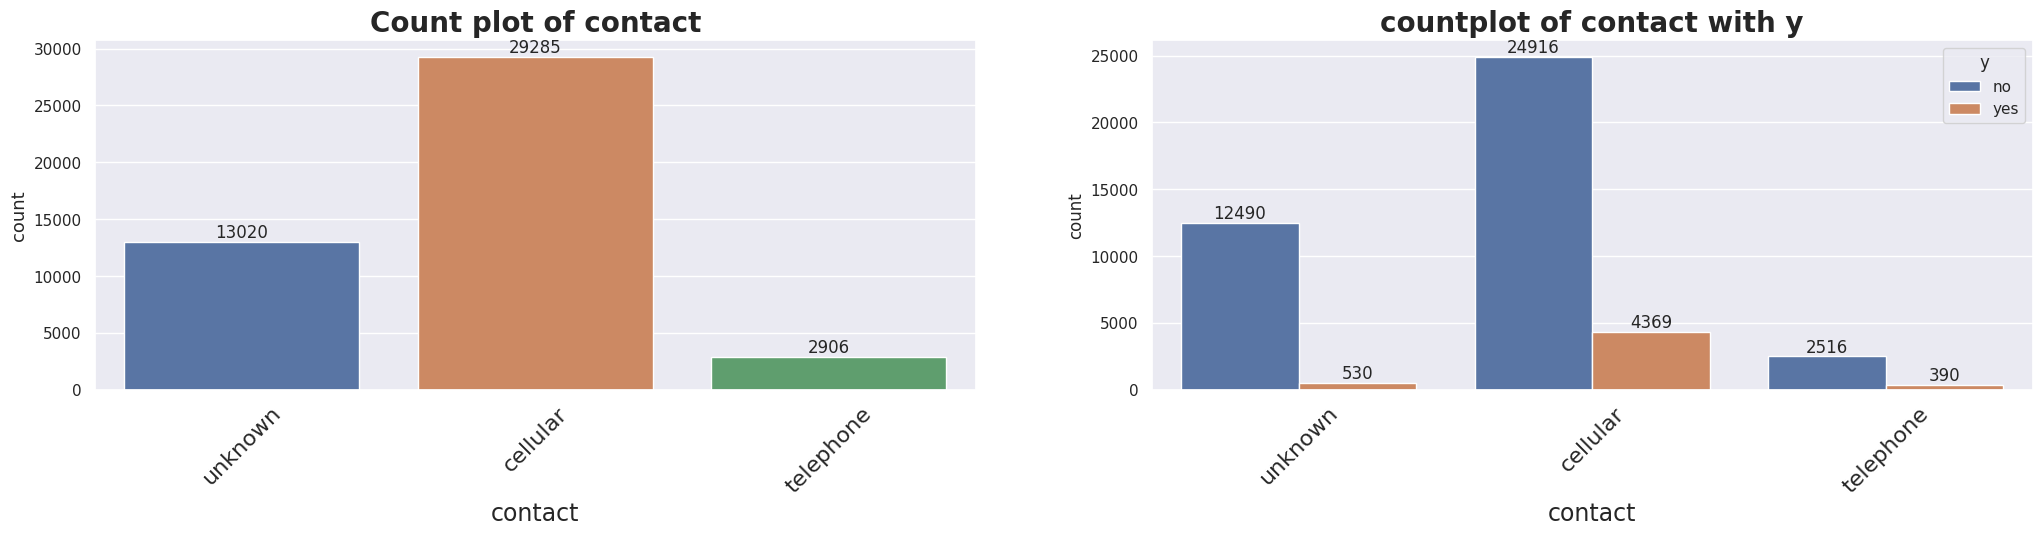

<Figure size 2500x1000 with 0 Axes>

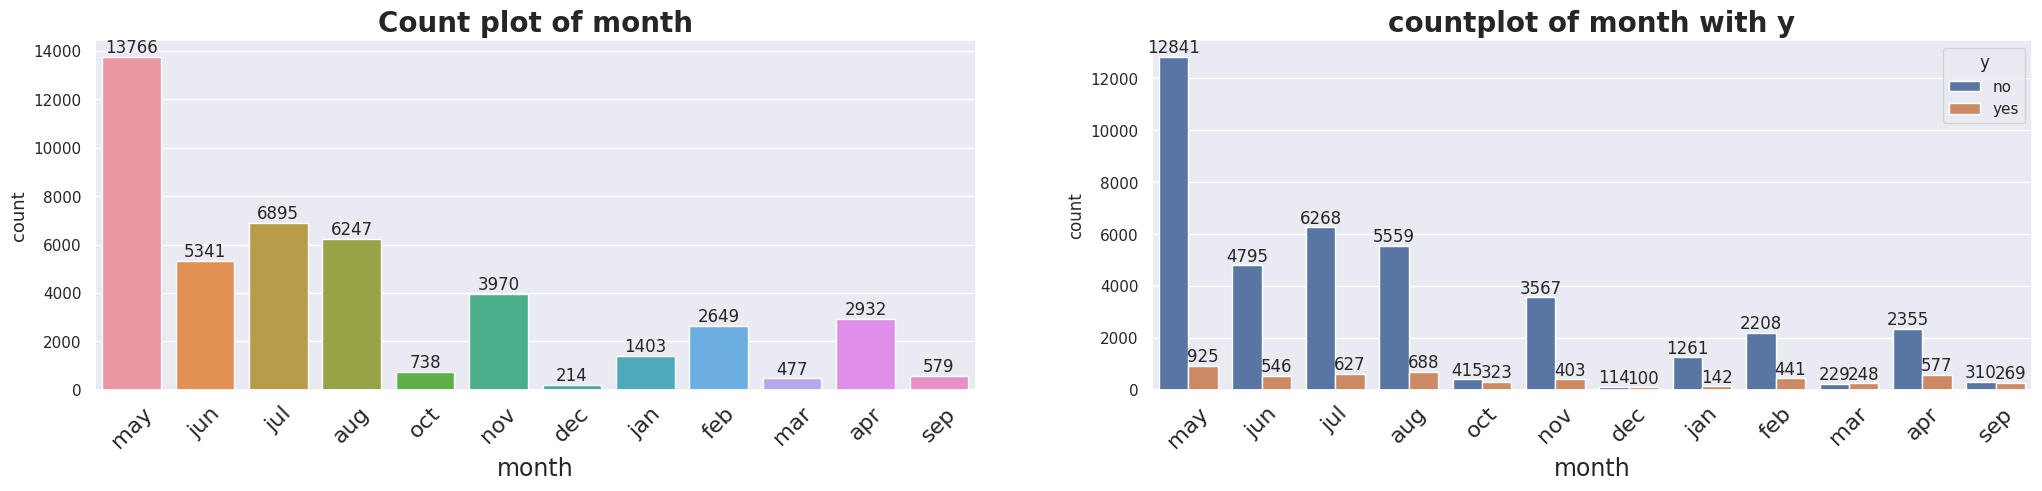

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

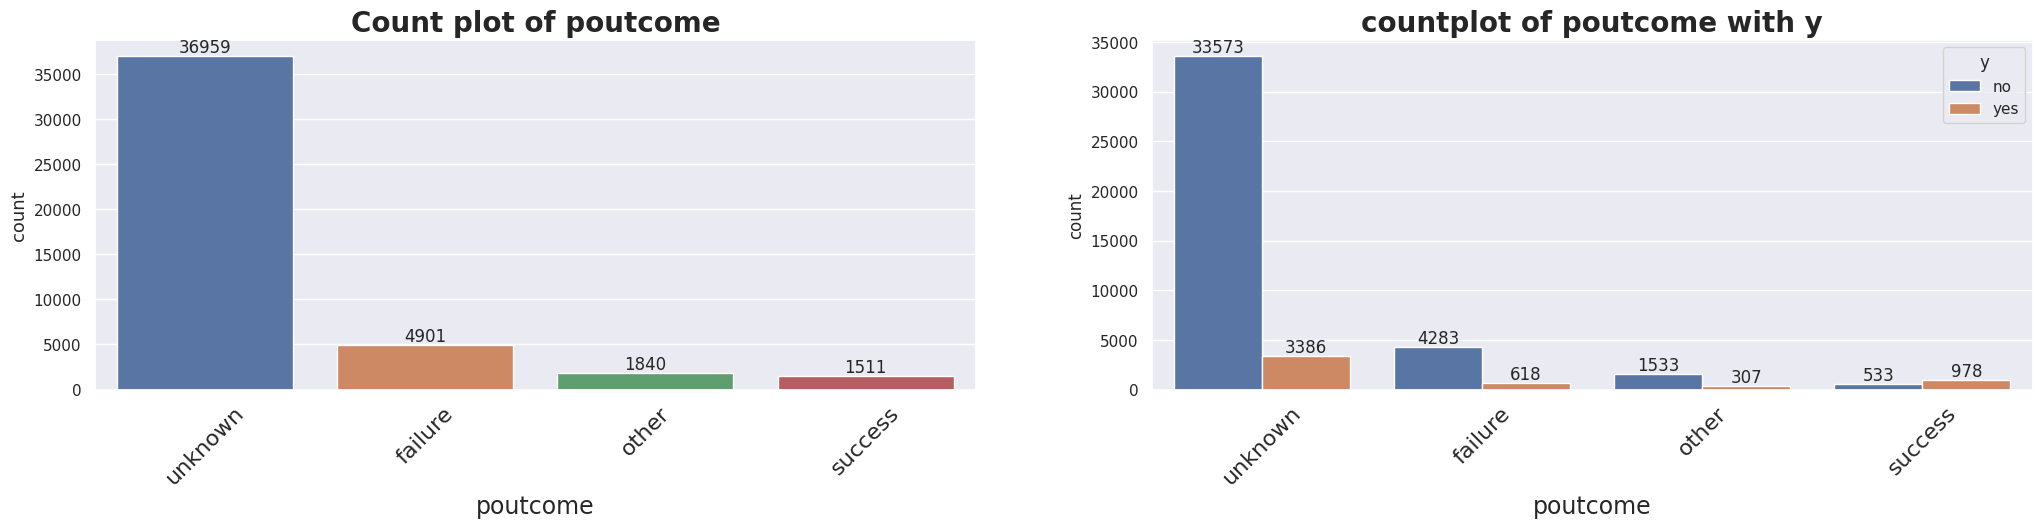

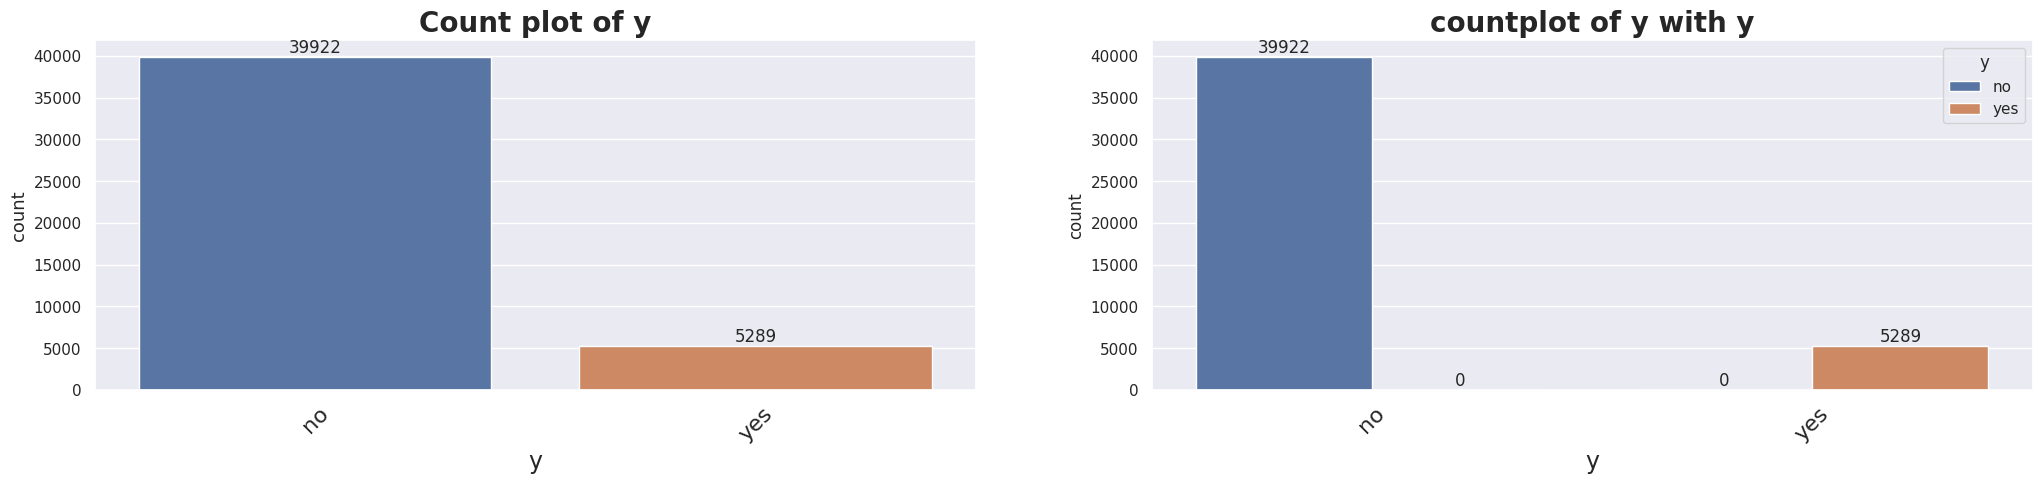

In [14]:
for i in df.columns:
    plt.figure(figsize=(25,10))
    
    if df[i].dtype == "object":
        plt.subplot(2,2,1)
        x=sn.countplot(data=df, x=i)
        for container in x.containers:
            x.bar_label(container)
        plt.xticks(rotation=45,fontsize=16)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=13)
        plt.title(f"Count plot of {i}",fontsize=20,weight="bold")
        
        print()
        
        plt.subplot(2,2,2)
        v=sn.countplot(data=df,x=i,hue="y")
        for container in v.containers:
            v.bar_label(container)
        plt.xticks(rotation=45,fontsize=16)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"countplot of {i} with y",fontsize=20,weight="bold" )
        plt.show()

# Defining X,Y

In [15]:
df_test=pd.read_csv('/kaggle/input/bank-term-deposit-predictions/test.csv')

In [16]:
l=LabelEncoder()
df=df.apply(l.fit_transform)
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41114,34,4,1,2,0,923,0,0,0,16,1,366,1,0,0,3,0
37910,35,4,1,2,0,534,1,0,0,13,8,111,2,353,1,1,0
975,20,0,2,1,0,1053,1,1,2,6,8,125,1,0,0,3,0
38828,18,2,2,2,0,1061,1,0,0,17,8,450,1,301,2,2,0
23166,14,9,2,2,0,1043,1,0,0,26,1,20,16,0,0,3,0


In [17]:
l=LabelEncoder()
df_test=df_test.apply(l.fit_transform)
df_test.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2051,12,0,2,1,0,934,1,0,2,25,8,521,1,0,0,3,1
2033,22,1,0,0,0,876,0,1,0,14,5,760,4,0,0,3,1
1175,41,3,1,0,0,761,0,0,2,11,6,820,2,0,0,3,0
2078,12,6,2,1,0,1164,0,0,0,19,9,405,0,0,0,3,0
2112,27,0,1,1,0,296,1,0,0,6,1,409,3,0,0,3,0


In [18]:
x_train = df.drop('y',axis = 1)
y_train = df['y']

In [19]:
x_test = df_test.drop('y',axis = 1)
y_test = df_test['y']

# Machine Learning Models

## Logistic Model

In [20]:
logistic_model=LogisticRegression(max_iter=1000,C=3,penalty="l2")
logistic_model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3, max_iter=1000)

In [21]:
logistic_model.score(x_test,y_test)

0.8860871488608715

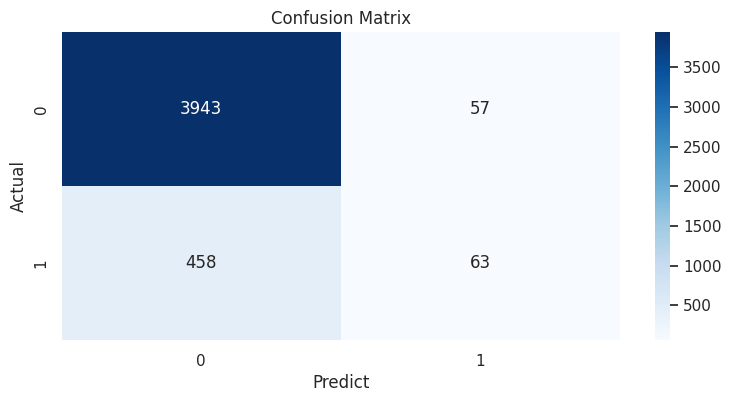

In [22]:
plt.figure(figsize=(9,4))
predicted=logistic_model.predict(x_test)

cm=confusion_matrix(y_test,predicted)
sn.heatmap(cm,annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Actual");

## Decision Tree Model

In [23]:
decision_tree=DecisionTreeClassifier(random_state=131)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=131)

In [24]:
decision_tree.score(x_test,y_test)

0.9040035390400354

## XGB Classifier

In [25]:
XGBC_model=XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=7)
XGBC_model.fit(x_train,y_train,early_stopping_rounds=5,eval_set=[(x_test,y_test)])

[0]	validation_0-logloss:0.36995
[1]	validation_0-logloss:0.36777
[2]	validation_0-logloss:0.36564
[3]	validation_0-logloss:0.36356
[4]	validation_0-logloss:0.36153
[5]	validation_0-logloss:0.35954
[6]	validation_0-logloss:0.35764
[7]	validation_0-logloss:0.35575
[8]	validation_0-logloss:0.35393
[9]	validation_0-logloss:0.35214
[10]	validation_0-logloss:0.35036


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.34859
[12]	validation_0-logloss:0.34690
[13]	validation_0-logloss:0.34516
[14]	validation_0-logloss:0.34344
[15]	validation_0-logloss:0.34174
[16]	validation_0-logloss:0.34012
[17]	validation_0-logloss:0.33849
[18]	validation_0-logloss:0.33697
[19]	validation_0-logloss:0.33551
[20]	validation_0-logloss:0.33395
[21]	validation_0-logloss:0.33243
[22]	validation_0-logloss:0.33102
[23]	validation_0-logloss:0.32963
[24]	validation_0-logloss:0.32828
[25]	validation_0-logloss:0.32689
[26]	validation_0-logloss:0.32556
[27]	validation_0-logloss:0.32427
[28]	validation_0-logloss:0.32297
[29]	validation_0-logloss:0.32169
[30]	validation_0-logloss:0.32042
[31]	validation_0-logloss:0.31921
[32]	validation_0-logloss:0.31799
[33]	validation_0-logloss:0.31678
[34]	validation_0-logloss:0.31555
[35]	validation_0-logloss:0.31435
[36]	validation_0-logloss:0.31317
[37]	validation_0-logloss:0.31201
[38]	validation_0-logloss:0.31082
[39]	validation_0-logloss:0.30972
[40]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
XGBC_model.score(x_train,y_train)

0.93306938576895

In [27]:
XGBC_model.score(x_test,y_test)

0.9086485290864853